# Analiza wpływu diety na zachorowania na covid-19

W ciągu ostatniego roku byliśmy świadkami największej pandemii ostatnich dekad.
Niestety pomimo szybkiego rozwoju medycyny i produkcji skutecznych szczepionek,
dalej jesteśmy narażeni na ryzyko.

Pandemia w wysokim stopniu wpływa na nasze życie codzienne a jego diametralne
zmiany które zaszły byłyby niedopomyślenia jeszcze półtora roku temu.
W związku z wszechobecnością zagrożenia zakażeniem, nalezy szukać wszelkich
przyczyn, jak i środków zapobiegawczych pozwalających minimalizować ryzyko infekcji.

Najważniejszym czynnikiem mającym wpływ na nasze zdrowie jest nasza dieta oraz aktywność fizyczna.
Poniższa analiza eksploruje zależności pomiędzy zwyczajami żywieniowymi populacji
poszczególnych krajów a wskaźnikami zachorowań na covid-19.

Analizowany zbiór [COVID-19 Healthy Diet Dataset](https://www.kaggle.com/mariaren/covid19-healthy-diet-dataset?select=Food_Supply_kcal_Data.csv) został pozyskany z srony [kaggle](https://www.kaggle.com]).
Warto zwrócić uwagę na fakt, że zbiór danych jest aktualizowany z opóźnieniem, a wersja użyta w poniższej analizie reprezentuje stan z początku lutego bieżącego roku.

## Opis zbioru danych

Zbiór `COVID-19 Healthy Diet Dataset` zawiera procentowy opis składu diety przeciętnego mieszkańca jednego z 170 państw.
Dostępne są cztery wersje powyższego zbioru, różniące się sposobem przeliczenia udziału poszczególnych produktów w diecie na udział procentowy.
Zdecydowano się wykorzystać zbiór w którym wartości wyrażają procentowy udział produktów pod względem ich wartości energetycznej (_kcal_).

Z każdym państwem związany jest również procentowy udział mieszkańców z potwierdzonym zachorowaniem covid-19,
ozdrowieńców oraz zmarłych w wyniku wirusa.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas
from ipywidgets import interact
from hdx.location.country import Country
from matplotlib.colors import ListedColormap

data = pd.read_csv('./data/Food_Supply_kcal_Data.csv')
data.head()

,Country,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,...,2.3012,0.7504,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0,%
1,Albania,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,...,2.8244,2.7508,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0,%
2,Algeria,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,...,5.7638,2.0457,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0,%
3,Angola,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,...,4.2741,0.3525,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0,%
4,Antigua and Barbuda,2.3041,15.3672,1.5429,0.0,13.7215,0.2057,1.7280,3.6824,7.0356,...,4.6904,1.2960,19.1,NaN,0.293878,0.007143,0.190816,0.095918,98000.0,%


In [2]:
data.describe()

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Treenuts,Vegetal Products,Vegetable Oils,Vegetables,Obesity,Confirmed,Deaths,Recovered,Active,Population
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,167.000000,164.000000,164.000000,164.000000,162.000000,1.700000e+02
mean,1.325197,9.294553,1.267419,0.002786,20.365358,0.428504,0.631501,2.011975,3.896367,2.924466,...,0.261619,40.707045,4.872421,1.086328,18.707784,2.021972,0.039370,1.452356,0.535158,4.452364e+07
std,1.062362,4.754174,1.283723,0.030879,6.467936,0.304333,0.579007,1.416149,2.216693,2.019384,...,0.285631,4.754308,2.164249,0.648232,9.633557,2.360454,0.048718,1.927617,1.329249,1.564182e+08
min,0.000000,1.623700,0.000000,0.000000,8.956500,0.018800,0.000000,0.147100,0.298000,0.116900,...,0.000000,27.708900,0.932500,0.095700,2.100000,0.000312,0.000000,0.000000,0.000000,5.400000e+04
25%,0.361300,5.082600,0.342850,0.000000,15.306175,0.141000,0.240150,1.224525,2.080700,1.107775,...,0.046625,36.830725,3.126350,0.602600,8.500000,0.140976,0.002013,0.099107,0.012028,2.816250e+06
50%,1.244600,9.034100,0.877500,0.000000,19.619950,0.403750,0.478300,1.694850,3.687450,2.719800,...,0.174000,40.969700,4.660650,1.003100,21.200000,1.011570,0.011998,0.475402,0.081040,1.018150e+07
75%,2.028050,13.174975,1.763175,0.000000,24.841450,0.632950,0.869675,2.370700,5.278325,4.319625,...,0.389575,44.940900,6.427900,1.366950,25.700000,3.487069,0.069503,2.622874,0.358183,3.271625e+07
max,5.157400,22.291100,7.800700,0.400700,37.526500,1.446100,4.418300,8.854000,10.567400,9.944100,...,1.421000,48.386400,10.383900,3.352400,45.600000,10.408199,0.185428,9.039871,8.019819,1.402385e+09


## Uzupełnianie brakujących danych i formatowanie danych

Prace z zbiorem rozpoczęto od sprawdzenia występowania pustych wartości oraz ich uzupełnienia.
Odkryto że kolumna `Undernourished` posiada niepoprawny typ danych, a w niektórych kolumnach występują wartości puste.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       170 non-null    object 
 1   Alcoholic Beverages           170 non-null    float64
 2   Animal Products               170 non-null    float64
 3   Animal fats                   170 non-null    float64
 4   Aquatic Products, Other       170 non-null    float64
 5   Cereals - Excluding Beer      170 non-null    float64
 6   Eggs                          170 non-null    float64
 7   Fish, Seafood                 170 non-null    float64
 8   Fruits - Excluding Wine       170 non-null    float64
 9   Meat                          170 non-null    float64
 10  Milk - Excluding Butter       170 non-null    float64
 11  Miscellaneous                 170 non-null    float64
 12  Offals                        170 non-null    float64
 13  Oilcr

### Rzutowanie na wartości liczbowe

Zauważono, że wartości kolumny `Undernourished` są ciągami znaków, pomimo tego
że większość wartości mogło by być przedstawione jako liczba zmiennoprzecinkowa.
Problematyczne wartości `<N` przedstawiające zakres, postanowiono zastąpić
wartością środkową zakresu. Przykładowo, wartość `<2.5` została zamieniona na `1.25`.

In [4]:
data['Undernourished'].values

array(['29.8', '6.2', '3.9', '25', nan, '4.6', '4.3', '<2.5', '<2.5',
       '<2.5', nan, '14.7', '3.9', '<2.5', '<2.5', '7.5', '10.1', '17.1',
       '<2.5', '26.4', '<2.5', '3.6', '20', '12.6', '16.4', '9.9', '<2.5',
       '59.6', '37.5', '2.7', '8.5', '4.8', '40.3', '4.8', '19', '<2.5',
       '<2.5', '5.6', '<2.5', '<2.5', '18.9', '6.2', '9.5', '7.9', '4.5',
       '9', '2.9', '20.6', '20.6', '3.7', '<2.5', '<2.5', '4.2', '10.5',
       '10.2', '7.9', '<2.5', '5.5', '<2.5', nan, '15.2', '16.5', '28',
       '8.1', '49.3', '12.9', '<2.5', '<2.5', '14.5', '8.3', '4.9', '29',
       '<2.5', '<2.5', '<2.5', '8', '<2.5', '12.2', '<2.5', '29.4', '2.7',
       '47.8', '<2.5', '2.8', '7.1', '16.5', '<2.5', '11', '13.1', '37.2',
       '<2.5', '<2.5', '44.4', '17.5', '2.5', '10.3', '6.3', '<2.5',
       '10.4', '6.5', '3.6', '13.4', '<2.5', '3.4', '27.9', '10.6',
       '27.3', '8.7', '<2.5', '7.1', '<2.5', '17', '16.5', '13.4', '3.2',
       '<2.5', '6.8', '20.3', '10', '10.7', '9.7', '13

In [5]:
def estimate_percentage_range(str_num_or_na):
    if type(str_num_or_na) == float and np.isnan(str_num_or_na):
        return str_num_or_na
    
    if type(str_num_or_na) == float:
        return str_num_or_na
    
    if str_num_or_na.startswith('<'):
        upper_range = str_num_or_na.replace('<', '')
        return float(upper_range) / 2
    
    if str_num_or_na.startswith('>'):
        upper_range = str_num_or_na.replace('>', '')
        return (float(upper_range) + 100) / 2
    
    return float(str_num_or_na)


data['Undernourished'] = data['Undernourished'].apply(estimate_percentage_range)

### Usunięcie zbędnych kolumn

Kolumną którą można usunąć bez straty danych jest kolumna `Unit (all except Population)`, gdyż wszystkie wiersze posiadają tą samą wartość `'%'`.
Następnie, ponieważ w dalszej analizie postanowiono nie analizować bieżącego przebiegu choroby w poszczególnych krajach,
usunięto kolumnę `Active`, zawierającą ilość aktywnych przypadków zachorowań.

In [6]:
data = data.drop('Unit (all except Population)', 1)
data = data.drop('Active', 1)

### Analiza pustych wartości

Następnie, wyświetlono część tabeli w której występowały puste wartości.

In [7]:
rows_with_missing_values = data.isnull().values.any(axis=1)
columns_with_missing_values = data.isnull().values.any(axis=0)
columns_with_missing_values = pd.Index(['Country']).append(data.columns[columns_with_missing_values])

data[rows_with_missing_values][columns_with_missing_values]

,Country,Obesity,Undernourished,Confirmed,Deaths,Recovered
4,Antigua and Barbuda,19.1,NaN,0.293878,0.007143,0.190816
10,Bahamas,32.1,NaN,2.100763,0.044784,1.735115
52,French Polynesia,NaN,4.2,NaN,NaN,NaN
59,Grenada,20.2,NaN,0.130973,0.000885,0.129204
80,Kiribati,45.6,2.7,NaN,NaN,NaN
81,"Korea, North",7.1,47.8,NaN,NaN,NaN
105,Myanmar,5.7,10.6,NaN,NaN,NaN
109,New Caledonia,NaN,7.1,NaN,NaN,NaN
124,Republic of Moldova,20.1,NaN,4.646195,0.099859,4.333692
128,Saint Kitts and Nevis,23.1,NaN,0.074074,0.000000,0.066667


Ponieważ ilość pustych danych nie była znacząca, a próba uzupełnienia danych mogłaby
znacząco zakłamać faktyczny stan, postanowiono usunąć wiersze posiadające puste wartości.

In [8]:
data = data.drop(data.index[rows_with_missing_values])
data = data.reset_index()

data.isnull().values.any()

False

### Dodanie kodu iso3

W kolejnym kroku dane zostaną przedstawione na interaktywnej mapie, do czego konieczne będzie wyznaczenie kodów `iso` każdego z państw.
Ponieważ w części wierszy wystepowały skróty lub nieoficjalne nazwy państw, konieczne było skorzystanie z rozmytej metody odszukiwania kodu iso.

In [9]:
# may return None
def get_iso3_fuzzy(name):
    return Country.get_iso3_country_code_fuzzy(name)[0]

def is_country_in_dataset(iso):
    return iso in data['iso3'].values

data['iso3'] = data['Country'].apply(get_iso3_fuzzy)
data = data[data['iso3'] != None]

## Wizualizacja danych

Kolejnym etapem było przedstawienie danych dotyczących każdego państwa na mapie.
W tym etapie konieczne było złączenie według kodu iso tabeli danych oraz tabeli geometrii mapy.

Następnie, utworzono wizualizację w której możliwe jest przedstawienie wybranej kolumny zbioru danych na mapie.

In [10]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

world['iso3'] = world['name'].apply(get_iso3_fuzzy)
world = world[~world['iso3'].isnull()]
world = world[world['iso3'].apply(is_country_in_dataset)]

In [11]:
selectable_columns = list(data.loc[:, 'Alcoholic Beverages':'Population'].columns)

world_w_data = world.merge(data, on='iso3')

@interact(column=selectable_columns)
def plot_country_with_data(column = selectable_columns[0]):
    fig, ax = plt.subplots(1, 1, figsize=(18,8))
    a = world_w_data.plot(column=column, ax=ax, legend=True)
    ax.set_title(f'Wartość \'{column}\' w poszczególnych krajach')
    ax.axis('off')

interactive(children=(Dropdown(description='column', options=('Alcoholic Beverages', 'Animal Products', 'Anima…

## Analiza wpływu niedożywnienia i otyłości

Pierwszym aspektem który postanowiono sprawdzić był potencjalny wpływ otyłości oraz niedożywienia na współczynnik zachorowań, ozdrowień oraz śmiertelności.
Oba zjawiska - otyłość i niedożywienie - przedstawiono na histogramach, w których wartości zostały rozgraniczone na trzy przedziały - niski, średni oraz wysoki.

In [12]:
class CategoryBreakpoints:
    '''
    Structure representing data partitioning into discrete categories.
    
    self.definition must be a dict of shape
    dict[str, {
        'min': float,
        'max': float,
        'color': str,
        'label': str
    }]
    '''
    def __init__(self, definition):
        self.definition = definition
        
    def category(self, category_key):
        return self.definition[category_key]
        
    def category_mask(self, values, category_key):
        below_threshold = values <= self.definition[category_key]['max']
        above_threshold = values > self.definition[category_key]['min']
        return below_threshold & above_threshold
    
    def category_for_value(self, value):
        return next(
            ((key, category) 
            for key, category in self.definition.items() 
            if category['min'] < value <= category['max']),
            None
        )[0]
        
    def plot_category_histogram(self, data, column, title='', xlabel='udział w populacji %'):
        hist, bins = np.histogram(data[column], bins=20)
        bin_centers = (bins[:-1] + bins[1:]) / 2
        bin_widths = bins[1:] - bins[:-1]
        
        for category_key, category in self.definition.items():
            mask = self.category_mask(bin_centers, category_key)
            plt.bar(
                bin_centers[mask],
                hist[mask],
                width=bin_widths[mask],
                color=category['color'],
                label=category['label'],
            )
        
        plt.title(title)
        plt.xlabel(xlabel)
        plt.legend()
        
    def plot_category_country_map(self, world_data, column, ax, title=''):
        data_categories = world_data[column].apply(self.category_for_value)
        
        for category_key, category in self.definition.items():
            data_in_category = world_data[data_categories == category_key]
            data_in_category.plot(ax=ax, color=category['color'])
            
        ax.axis('off')
        ax.set_title(title)
        
    def plot_histogram_and_conutry_map(self, world_data, column, hist_title='', hist_xlabel='udział w populacji %', map_title=''):
        plt.subplots(figsize=(15, 5))
        plt.subplot(131)
        self.plot_category_histogram(world_data, column, title=hist_title, xlabel=hist_xlabel)
        
        ax = plt.subplot(122)
        self.plot_category_country_map(world_data, column, ax, title=map_title)

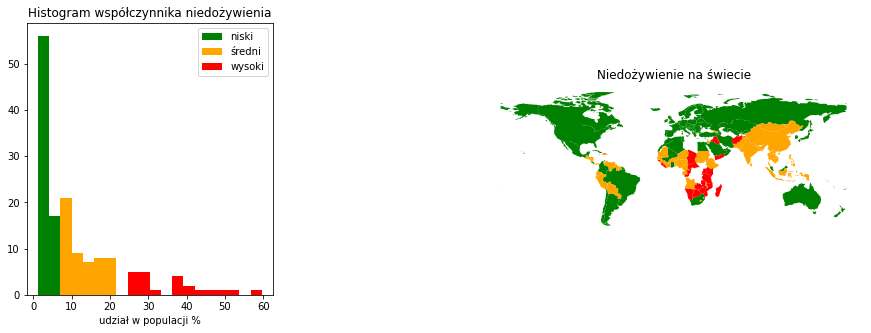

In [13]:
undernourishment_brakpoints = CategoryBreakpoints({
    'low': { 'min': 0, 'max': 7.5, 'color': 'green', 'label': 'niski' },
    'medium': { 'min': 7.5, 'max': 25, 'color': 'orange', 'label': 'średni' },
    'high': { 'min': 25, 'max': 100, 'color': 'red', 'label': 'wysoki' },
})

undernourishment_brakpoints.plot_histogram_and_conutry_map(
    world_w_data,
    column='Undernourished',
    hist_title='Histogram współczynnika niedożywienia',
    map_title='Niedożywienie na świecie',
)

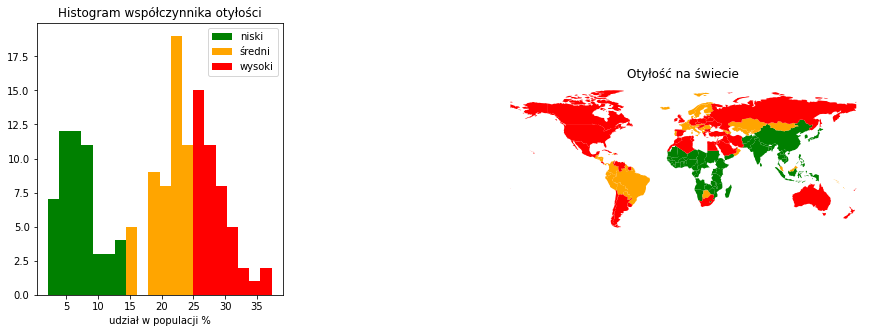

In [14]:
obesity_brakpoints = CategoryBreakpoints({
    'low': { 'min': 0, 'max': 15, 'color': 'green', 'label': 'niski' },
    'medium': { 'min': 15, 'max': 25, 'color': 'orange', 'label': 'średni' },
    'high': { 'min': 25, 'max': 100, 'color': 'red', 'label': 'wysoki' },
})

obesity_brakpoints.plot_histogram_and_conutry_map(
    world_w_data,
    column='Obesity',
    hist_title='Histogram współczynnika otyłości',
    map_title='Otyłość na świecie',
)

### Interaktywny diagram przypadków covid-19 w zależności od optyłości i niedożywienia

Wykres pozwala przeglądać średnią zachorowalność, stosunek ozdrowieńców oraz zmarłych w krajach znajdujących się wskazanej sekcji
histogramów otyłości i niedożywienia.

Przykładowo, przesunięcie suwaka `undernourishment` na skrajną prawą pozycję oznacza branie pod uwagę wszystkich państw.
Jego lewa pozycja oznacza analizę państw o najniższych współczynniku niedożywienia. Analogicznie działa suwak `obesity`.
Jednocześnie możemy obserwować procent populacji który nie został wykluczony w wyniku manipulacji suwakami.

In [15]:
def divide_and_plot_under_nourishment(threshold):
    hist, bins = np.histogram(data['Undernourished'], bins=10)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    bin_widths = bins[1:] - bins[:-1]

    low_mask = bin_centers <= threshold
    high_mask = bin_centers > threshold
    
    plt.bar(bin_centers[low_mask], hist[low_mask], width=bin_widths[low_mask], color='green', label='kraje brane pod uwagę')
    plt.bar(bin_centers[high_mask], hist[high_mask], width=bin_widths[high_mask], color='gray', label='kraje ignorowane')
    plt.title('Histogram niedożywienia')
    plt.xlabel('udział w populacji %')
    plt.legend()
    
    return data['Undernourished'] < threshold


def divide_and_plot_obesity(threshold):
    hist, bins = np.histogram(data['Obesity'], bins=10)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    bin_widths = bins[1:] - bins[:-1]

    low_mask = bin_centers <= threshold
    high_mask = bin_centers > threshold
    
    plt.bar(bin_centers[low_mask], hist[low_mask], width=bin_widths[low_mask], color='green', label='kraje brane pod uwagę')
    plt.bar(bin_centers[high_mask], hist[high_mask], width=bin_widths[high_mask], color='gray', label='kraje ignorowane')
    plt.title('Histogram otyłości')
    plt.xlabel('udział w populacji %')
    plt.legend()
    
    return data['Obesity'] < threshold


def plot_covid_distribution_of_countries(visualized_countries_idx):
    confirmed = data[visualized_countries_idx]['Confirmed'].mean()
    recovered = data[visualized_countries_idx]['Recovered'].mean()
    deaths = data[visualized_countries_idx]['Deaths'].mean()
    
    plot_covid_distribution(confirmed, recovered, deaths, title='Przypadki covid w wybraych krajach')
    
def plot_covid_distribution(confirmed, recovered, deaths, title):
    plt.bar('Confirmed', confirmed, color='green')
    plt.bar('Recovered', recovered, color='blue')
    plt.bar('Deaths', deaths, color='red')
    plt.title(title)
    plt.ylim(0, 5)


def plot_analized_population_percentage(visualized_countries_idx):
    total_population = data['Population'].sum()
    visualized_population = data[visualized_countries_idx]['Population'].sum()
    visualized_percentage = visualized_population / total_population * 100
    
    plt.bar('Population', visualized_percentage, color='green')
    plt.title('Procent populacji świata brany pod uwagę')
    plt.ylim(0, 100)
    

@interact(undernourishment=(10, 40, 1), obesity=(10, 40, 1))
def divide_and_plot(undernourishment = 25, obesity=25):
    plt.subplots(figsize=(18,8))
    
    plt.subplot(231)
    idx_below_undernourishment_threshold = divide_and_plot_under_nourishment(undernourishment)
    
    plt.subplot(232)
    idx_below_obesity_threshold = divide_and_plot_obesity(obesity)
    visualized_countries_idx = idx_below_undernourishment_threshold & idx_below_obesity_threshold
    
    plt.subplot(233)
    plot_analized_population_percentage(visualized_countries_idx)
    
    plt.subplot(212)
    plot_covid_distribution_of_countries(visualized_countries_idx)

    plt.tight_layout()
    plt.show()

interactive(children=(IntSlider(value=25, description='undernourishment', max=40, min=10), IntSlider(value=25,…

Na podstawie powyższej wizualizacji można zauważyć, że w krajach o najniższym poziomie niedożywienia
i jednocześnie najwyższym poziomie otyłości występuje najwięcej przypadków choroby.

Powyższą tezę zwalidowano mierząc kowariancję zmiennej `Undernourished` i `Obesity` względem ilości
potwierdzonej ilości przypadków covid-19 `Confirmed`.

Można zauważyć wysoką ujemną zależność współczynnika niedożywienia od ilości zachorowań i 
wysoką zależność otyłości do ilości zachorowań, co potwiedza powyższą tezę.

In [16]:
undernourishment_confirm_cov = np.cov(data['Undernourished'], data['Confirmed'])
obesity_confirm_cov = np.cov(data['Obesity'], data['Confirmed'])

print('''
Coviariance between 'Undernourished' and 'Confirmed' {}
Coviariance between 'Obesity' and 'Confirmed' {}
'''.format(undernourishment_confirm_cov[0,1], obesity_confirm_cov[0,1]))


Coviariance between 'Undernourished' and 'Confirmed' -13.608246717583581
Coviariance between 'Obesity' and 'Confirmed' 11.955239718339612



### Analiza wpływu składu diety na zachorowalność covid-19

Aby ułatwić porównywanie wartości, zdecyowano się pogrupować poszczególne kolumny zbiory danych na kategorie opisane poniższym słownikiem.
Do zbioru dodano poniższe kolumny.

In [17]:
categories = {
    'Fruits & Vegetables': [
        'Fruits - Excluding Wine', 
        'Vegetal Products', 
        'Vegetable Oils', 
        'Vegetables'
    ],
    'All Animal Products': [
        'Animal Products',
        'Animal fats', 
        'Aquatic Products, Other', 
        'Meat', 
        'Milk - Excluding Butter', 
        'Offals', 
        'Eggs', 
        'Fish, Seafood', 
        'Milk - Excluding Butter'
    ],
    'Starches': ['Starchy Roots', 'Cereals - Excluding Beer', 'Pulses'],
    'Sugars': ['Sugar Crops', 'Sugar & Sweeteners'],
    'Substances': ['Alcoholic Beverages', 'Stimulants'],
    'Other': ['Miscellaneous', 'Oilcrops', 'Spices', 'Treenuts']
}

for new_column, aggregated_columns in categories.items():
    data[new_column] = data[aggregated_columns].sum(axis=1)

Następnie, przygotowano model regresji wielowymiarowej.
Jego zadaniem jest przewidzenie wartości współczynników zachorowań, ozdrowień i śmierci
na podstawie procentowego udziału każdej z powyższych kategorii w diecie.

Zdecydowano się skorzystać z modelu regresji opartego o algorytm k najbliższych sąsiadów. 
Jego działanie polega na dopasowaniu `k` elementów zbioru najbardziej zbliżonych do danych wyjściowych oraz obliczeniu średniej ich wartości docelowych. 
Na ten model zdecydowano się z powodu jego intuicyjności i minimalizacji ryzyka uzyskiwania nieprzewidywalnych rezultatów.

In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor

X, Y = data[categories.keys()].values, data[['Confirmed', 'Recovered', 'Deaths']].values

regressor = KNeighborsRegressor(n_neighbors=10)
model = MultiOutputRegressor(regressor).fit(X, Y)

### Interaktywny diagram składu diety oraz estymowanych współczynników

Poniższy diagram pozwala na konfigurację udziału każdej kategorii produków w diecie,
oraz obserwowanie przewidzianej zachorowalności populacji jej stosującą.

Przykładowo, przesunięcie wszystkich suwaków na skrajną lewą pozycję z wyjątkiem jednego,
oznacza dietę składającą się jedynie z wskazanej kategorii produktów.

In [19]:
@interact(
    fruits_and_vegetables=(0, 1.0),
    animal_products=(0.0, 1.0),
    starches=(0.0, 1.0),
    sugars=(0.0, 1.0),
    substances=(0.0, 1.0),
    other=(0.0, 1.0)
)
def plot_cases_by_diet(
    fruits_and_vegetables=0.5,
    animal_products=0.5,
    starches=0.5,
    sugars=0.5,
    substances=0.5,
    other=0.5
):
    # scale all values so that the add up to 100
    # (just like input data which is measured in percentages)
    weights_total = sum([fruits_and_vegetables, animal_products, starches, sugars, substances, other])
    fruits_and_vegetables = fruits_and_vegetables / weights_total * 100
    animal_products = animal_products / weights_total * 100
    starches = starches / weights_total * 100
    sugars = sugars / weights_total * 100
    substances = substances / weights_total * 100
    other = other / weights_total * 100
    
    model_input = [[
        fruits_and_vegetables,
        animal_products,
        starches,
        sugars,
        substances,
        other,
    ]]
    
    confirmed, recovered, deaths = model.predict(model_input).flatten()
    
    plot_covid_distribution(confirmed, recovered, deaths, title='Estymowane współczynniki dla zadanej diety')

interactive(children=(FloatSlider(value=0.5, description='fruits_and_vegetables', max=1.0), FloatSlider(value=…

## Wnioski

Na podstawie utworzonych wizualizacji stwierdzono bezsprzeczne istnienie pewnych korelacji.

Odkryto, że w krajach o wysokim wskaźniku otyłości który najczęściej idzie w parze z niskim wskaźnikiem niedożywienia
zaobserwowano większą ilość **wykrywanych** przypadków covid-19. Podobnie zauważono, że w krajach w których
spożywa się więcej produktów zwierzęcych kosztem owoców i warzyw również ilośc odnotowanych przypadków jest wyższa.

Jednakże, warto podkreślić że opisane zależności nie wyrokują istnienia bezpośredniego
powiązania przyczyno-skutkowego pomiędzy dietą a wskaźnikami zachorowań, a jedynie stwierdzają 
istnienie pewnych korelacji które mogą odzwierciedlać inne cachy krajów, takie jak stopień zamożności i jakość służby zdrowia.